In [1]:
%run 'VMCstates.py'
import time

/Users/hwanda/VMC/VMCstates.py:968: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if q0s is 0:
/Users/hwanda/VMC/VMCstates.py:1090: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if q0 is 0:


## VariationalStates

#### initiate states

In [3]:
mdl = VariationalModel(1)
configs = []
configs.append(Configuration([0, 1, 2, 3]))
configs.append(Configuration([4, 5, 6, 7]))
configs.append(Configuration([0, 1, 6, 7]))
configs.append(Configuration([0, 5, 2, 3]))
VariationalStates(mdl, configs)

VariationalStates([[0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 6, 7], [0, 5, 2, 3]])

In [4]:
states = mdl.states(wlks=4)
states

VariationalStates([[0, 5, 2, 7], [4, 1, 6, 7], [4, 5, 6, 7], [4, 5, 2, 3]])

In [5]:
states1 = states.clone()
states1.configs

[[0, 5, 2, 7], [4, 1, 6, 7], [4, 5, 6, 7], [4, 5, 2, 3]]

In [6]:
ref = states.split()
ref

[VariationalState([0, 5, 2, 7]),
 VariationalState([4, 1, 6, 7]),
 VariationalState([4, 5, 6, 7]),
 VariationalState([4, 5, 2, 3])]

In [7]:
states

VariationalStates([[0, 5, 2, 7], [4, 1, 6, 7], [4, 5, 6, 7], [4, 5, 2, 3]])

### To compare

#### qi

In [8]:
for state in ref:
    print(state.qi)

tensor([[ 0,  2],
        [ 0, -2]])
tensor([[ 1, -1],
        [-1,  1]])
tensor([[0, 0],
        [0, 0]])
tensor([[-2,  0],
        [ 2,  0]])


In [9]:
states.qis

tensor([[[ 0,  2],
         [ 0, -2]],

        [[ 1, -1],
         [-1,  1]],

        [[ 0,  0],
         [ 0,  0]],

        [[-2,  0],
         [ 2,  0]]])

#### W

In [10]:
for state in ref:
    print(state.W)

tensor([[ 1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-1.9429e-16,  1.4142e+00, -1.5266e-16, -1.0000e+00],
        [-8.6736e-18,  5.5511e-17,  1.0000e+00, -3.4694e-17],
        [-1.2490e-16, -1.0000e+00, -2.4980e-16,  1.4142e+00],
        [ 1.4142e+00,  4.7184e-16,  1.0000e+00, -3.1919e-16],
        [-2.7756e-17,  1.0000e+00, -2.7756e-17, -5.5511e-17],
        [ 1.0000e+00,  8.0491e-16,  1.4142e+00, -3.8164e-16],
        [-1.3878e-17,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64, grad_fn=<MmBackward0>)
tensor([[ 1.4142e+00,  1.9107e-16, -1.0000e+00,  4.8168e-17],
        [ 0.0000e+00,  1.0000e+00,  2.7756e-17,  5.5511e-17],
        [-1.0000e+00, -3.8164e-16,  1.4142e+00, -9.7145e-17],
        [ 0.0000e+00, -7.0711e-01, -2.5674e-16,  7.0711e-01],
        [ 1.0000e+00,  1.1796e-16, -9.3675e-17, -2.7756e-17],
        [ 0.0000e+00,  7.0711e-01,  1.1102e-16,  7.0711e-01],
        [ 0.0000e+00,  4.1633e-17,  1.0000e+00,  6.9389e-17],
        [ 0.0000e+

In [11]:
states.Ws

tensor([[[ 1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [-1.9429e-16,  1.4142e+00, -1.5266e-16, -1.0000e+00],
         [-8.6736e-18,  5.5511e-17,  1.0000e+00, -3.4694e-17],
         [-1.2490e-16, -1.0000e+00, -2.4980e-16,  1.4142e+00],
         [ 1.4142e+00,  4.7184e-16,  1.0000e+00, -3.1919e-16],
         [-2.7756e-17,  1.0000e+00, -2.7756e-17, -5.5511e-17],
         [ 1.0000e+00,  8.0491e-16,  1.4142e+00, -3.8164e-16],
         [-1.3878e-17,  0.0000e+00,  0.0000e+00,  1.0000e+00]],

        [[ 1.4142e+00,  1.9107e-16, -1.0000e+00,  4.8168e-17],
         [ 0.0000e+00,  1.0000e+00,  2.7756e-17,  5.5511e-17],
         [-1.0000e+00, -3.8164e-16,  1.4142e+00, -9.7145e-17],
         [ 0.0000e+00, -7.0711e-01, -2.5674e-16,  7.0711e-01],
         [ 1.0000e+00,  1.1796e-16, -9.3675e-17, -2.7756e-17],
         [ 0.0000e+00,  7.0711e-01,  1.1102e-16,  7.0711e-01],
         [ 0.0000e+00,  4.1633e-17,  1.0000e+00,  6.9389e-17],
         [ 0.0000e+00,  5.5511e-17, -2.7756e-17,  1.0

#### logdet

In [12]:
for state in ref:
    print(state.logdet)

tensor(-2.0794, dtype=torch.float64, grad_fn=<LinalgSlogdetBackward0>)
tensor(-1.7329, dtype=torch.float64, grad_fn=<LinalgSlogdetBackward0>)
tensor(-2.0794, dtype=torch.float64, grad_fn=<LinalgSlogdetBackward0>)
tensor(-1.3863, dtype=torch.float64, grad_fn=<LinalgSlogdetBackward0>)


In [13]:
states.logdets

tensor([-2.0794, -1.7329, -2.0794, -1.3863], dtype=torch.float64,
       grad_fn=<LinalgSlogdetBackward0>)

#### det

In [14]:
for state in ref:
    print(state.det)

tensor(-0.1250, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(-0.1768, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(-0.1250, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(-0.2500, dtype=torch.float64, grad_fn=<MulBackward0>)


In [15]:
states.dets

tensor([-0.1250, -0.1768, -0.1250, -0.2500], dtype=torch.float64,
       grad_fn=<MulBackward0>)

#### sign

In [16]:
for state in ref:
    print(state.sign)

tensor(-1., dtype=torch.float64)
tensor(-1., dtype=torch.float64)
tensor(-1., dtype=torch.float64)
tensor(-1., dtype=torch.float64)


In [17]:
states.signs

tensor([-1., -1., -1., -1.], dtype=torch.float64)

#### energy

In [18]:
for state in ref:
    print(state.energy)

tensor(6.4378, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(6.4378, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(6.4378, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(6.4378, dtype=torch.float64, grad_fn=<AddBackward0>)


In [19]:
states.energys

tensor([6.4378, 6.4378, 6.4378, 6.4378], dtype=torch.float64,
       grad_fn=<AddBackward0>)

#### logprob

In [20]:
for state in ref:
    print(state.logprob)

tensor(-10.5966, dtype=torch.float64, grad_fn=<SubBackward0>)
tensor(-9.9035, dtype=torch.float64, grad_fn=<SubBackward0>)
tensor(-10.5966, dtype=torch.float64, grad_fn=<SubBackward0>)
tensor(-9.2103, dtype=torch.float64, grad_fn=<SubBackward0>)


In [21]:
states.logprobs

tensor([-10.5966,  -9.9035, -10.5966,  -9.2103], dtype=torch.float64,
       grad_fn=<SubBackward0>)

#### replace and W-update

In [22]:
configs = []
configs.append(Configuration([0, 1, 2, 3]))
configs.append(Configuration([4, 5, 6, 7]))
configs.append(Configuration([0, 1, 6, 7]))
configs.append(Configuration([0, 5, 2, 3]))
sts = VariationalStates(mdl, configs)
sts

VariationalStates([[0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 6, 7], [0, 5, 2, 3]])

In [23]:
sts.Ws

tensor([[[ 1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 1.3878e-17,  1.0000e+00,  2.7756e-17,  2.2204e-16],
         [ 3.1225e-17,  0.0000e+00,  1.0000e+00,  6.9389e-17],
         [-6.9389e-18,  0.0000e+00,  2.0817e-17,  1.0000e+00],
         [ 1.4142e+00,  2.7756e-16,  1.0000e+00,  4.1633e-17],
         [ 3.8858e-16,  1.4142e+00,  4.7184e-16,  1.0000e+00],
         [ 1.0000e+00,  6.1062e-16,  1.4142e+00,  3.3307e-16],
         [ 3.6082e-16,  1.0000e+00,  5.2736e-16,  1.4142e+00]],

        [[ 1.4142e+00,  2.0831e-16, -1.0000e+00, -2.6875e-17],
         [ 0.0000e+00,  1.4142e+00, -2.4980e-16, -1.0000e+00],
         [-1.0000e+00, -5.1348e-16,  1.4142e+00,  1.8735e-16],
         [ 0.0000e+00, -1.0000e+00, -6.9389e-17,  1.4142e+00],
         [ 1.0000e+00,  1.2490e-16, -4.8572e-17, -4.1633e-17],
         [ 0.0000e+00,  1.0000e+00, -8.3267e-17, -1.1102e-16],
         [ 0.0000e+00,  1.1102e-16,  1.0000e+00, -4.8572e-17],
         [ 0.0000e+00, -1.1102e-16, -4.1633e-17,  1.0

In [24]:
sts.logprobs

tensor([-10.5966, -10.5966,  -9.2103,  -9.9035], dtype=torch.float64,
       grad_fn=<SubBackward0>)

In [25]:
need_updt = [2, 0]
mode_srcs = [1, 2]
mode_tgts = [1, 7]
need_updt, mode_srcs, mode_tgts

([2, 0], [1, 2], [1, 7])

In [26]:
sts1 = sts.clone()
sts1.replace(mode_srcs, mode_tgts, need_updt)

VariationalStates([[0, 1, 7, 3], [4, 5, 6, 7], [0, 1, 6, 7], [0, 5, 2, 3]])

In [27]:
sts1.logprobs

tensor([-80.9539, -10.5966,  -9.2103,  -9.9035], dtype=torch.float64,
       grad_fn=<SubBackward0>)

In [28]:
sts1._temps

([2, 0], [1, 7], [1, 2])

In [29]:
sts1.Ws

tensor([[[ 1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [-5.1129e-18,  9.4737e-01,  5.2632e-02, -7.4432e-02],
         [-6.8421e-01, -1.8963e+15,  1.8963e+15, -2.6817e+15],
         [-2.1182e-17, -3.9474e-02,  3.9474e-02,  9.4418e-01],
         [ 7.3000e-01, -1.8963e+15,  1.8963e+15, -2.6817e+15],
         [ 6.5737e-17,  5.1948e-01,  8.9474e-01, -2.6535e-01],
         [ 3.2380e-02, -2.6817e+15,  2.6817e+15, -3.7925e+15],
         [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00]],

        [[ 1.4142e+00,  2.0831e-16, -1.0000e+00, -2.6875e-17],
         [ 0.0000e+00,  1.4142e+00, -2.4980e-16, -1.0000e+00],
         [-1.0000e+00, -5.1348e-16,  1.4142e+00,  1.8735e-16],
         [ 0.0000e+00, -1.0000e+00, -6.9389e-17,  1.4142e+00],
         [ 1.0000e+00,  1.2490e-16, -4.8572e-17, -4.1633e-17],
         [ 0.0000e+00,  1.0000e+00, -8.3267e-17, -1.1102e-16],
         [ 0.0000e+00,  1.1102e-16,  1.0000e+00, -4.8572e-17],
         [ 0.0000e+00, -1.1102e-16, -4.1633e-17,  1.0

In [30]:
st1 = mdl.state(Configuration([0, 1, 2, 3]))
st2 = mdl.state(Configuration([0, 1, 6, 7]))
st1, st2

(VariationalState([0, 1, 2, 3]), VariationalState([0, 1, 6, 7]))

In [31]:
st1.W, st2.W

(tensor([[ 1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 1.3878e-17,  1.0000e+00,  2.7756e-17,  2.2204e-16],
         [ 3.1225e-17,  0.0000e+00,  1.0000e+00,  6.9389e-17],
         [-6.9389e-18,  0.0000e+00,  2.0817e-17,  1.0000e+00],
         [ 1.4142e+00,  2.7756e-16,  1.0000e+00,  4.1633e-17],
         [ 3.8858e-16,  1.4142e+00,  4.7184e-16,  1.0000e+00],
         [ 1.0000e+00,  6.1062e-16,  1.4142e+00,  3.3307e-16],
         [ 3.6082e-16,  1.0000e+00,  5.2736e-16,  1.4142e+00]],
        dtype=torch.float64, grad_fn=<MmBackward0>),
 tensor([[ 1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  1.0000e+00,  2.7756e-17,  5.5511e-17],
         [-7.0711e-01, -2.7062e-16,  7.0711e-01, -6.9389e-17],
         [ 0.0000e+00, -7.0711e-01, -2.5674e-16,  7.0711e-01],
         [ 7.0711e-01,  6.9389e-18,  7.0711e-01, -5.5511e-17],
         [ 0.0000e+00,  7.0711e-01,  1.1102e-16,  7.0711e-01],
         [ 0.0000e+00,  4.1633e-17,  1.0000e+00,  6.9389e-17],
 

In [32]:
st1.replace(2, 7), st2.replace(1, 1)

(VariationalState([0, 1, 7, 3]), VariationalState([0, 1, 6, 7]))

In [33]:
st1.logprob, st2.logprob

(tensor(-80.9539, dtype=torch.float64, grad_fn=<SubBackward0>),
 tensor(-9.2103, dtype=torch.float64, grad_fn=<SubBackward0>))

In [34]:
st1.W, st2.W

(tensor([[ 1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [-5.1129e-18,  9.4737e-01,  5.2632e-02, -7.4432e-02],
         [-6.8421e-01, -1.8963e+15,  1.8963e+15, -2.6817e+15],
         [-2.1182e-17, -3.9474e-02,  3.9474e-02,  9.4418e-01],
         [ 7.3000e-01, -1.8963e+15,  1.8963e+15, -2.6817e+15],
         [ 6.5737e-17,  5.1948e-01,  8.9474e-01, -2.6535e-01],
         [ 3.2380e-02, -2.6817e+15,  2.6817e+15, -3.7925e+15],
         [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00]],
        dtype=torch.float64, grad_fn=<UpdateWBackward>),
 tensor([[ 1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  1.0000e+00,  2.7756e-17,  5.5511e-17],
         [-7.0711e-01, -2.7062e-16,  7.0711e-01, -6.9389e-17],
         [ 0.0000e+00, -7.0711e-01, -2.5674e-16,  7.0711e-01],
         [ 7.0711e-01,  6.9389e-18,  7.0711e-01, -5.5511e-17],
         [ 0.0000e+00,  7.0711e-01,  1.1102e-16,  7.0711e-01],
         [ 0.0000e+00,  4.1633e-17,  1.0000e+00,  6.9389e-17

In [35]:
st1.W, st2.W, sts1.Ws[0], sts1.Ws[2]

(tensor([[ 1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [-5.1129e-18,  9.4737e-01,  5.2632e-02, -7.4432e-02],
         [-6.8421e-01, -1.8963e+15,  1.8963e+15, -2.6817e+15],
         [-2.1182e-17, -3.9474e-02,  3.9474e-02,  9.4418e-01],
         [ 7.3000e-01, -1.8963e+15,  1.8963e+15, -2.6817e+15],
         [ 6.5737e-17,  5.1948e-01,  8.9474e-01, -2.6535e-01],
         [ 3.2380e-02, -2.6817e+15,  2.6817e+15, -3.7925e+15],
         [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00]],
        dtype=torch.float64, grad_fn=<UpdateWBackward>),
 tensor([[ 1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  1.0000e+00,  2.7756e-17,  5.5511e-17],
         [-7.0711e-01, -2.7062e-16,  7.0711e-01, -6.9389e-17],
         [ 0.0000e+00, -7.0711e-01, -2.5674e-16,  7.0711e-01],
         [ 7.0711e-01,  6.9389e-18,  7.0711e-01, -5.5511e-17],
         [ 0.0000e+00,  7.0711e-01,  1.1102e-16,  7.0711e-01],
         [ 0.0000e+00,  4.1633e-17,  1.0000e+00,  6.9389e-17

#### transprob

In [36]:
states.trans_probs(0)

tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]],

        [[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]],

        [[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]],

        [[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]]], dtype=torch.float64)

In [37]:
for state in ref:
    print(state.trans_prob(0))

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], dtype=torch.float64)
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], dtype=torch.float64)
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], dtype=torch.float64)
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], dtype=torch.float64)


#### operator evaluate

In [38]:
H = - mdl.lattice.Ht + 5 * mdl.lattice.HJ
Ht, HJ = - mdl.lattice.Ht, 5 * mdl.lattice.HJ

In [39]:
for state in ref:
    print(H.evaluate(state))

tensor(-3.1569, dtype=torch.float64)
tensor(-4.2426, dtype=torch.float64)
tensor(-5.6569, dtype=torch.float64)
tensor(-2.8284, dtype=torch.float64)


In [40]:
H.evaluates(states)

tensor([-3.1569, -4.2426, -5.6569, -2.8284], dtype=torch.float64)

In [41]:
Ht.mul_evaluate(states, bilinear=True) + HJ.mul_evaluate(states, bilinear=False)

tensor([-3.1569, -4.2426, -5.6569, -2.8284], dtype=torch.float64)

## propose & MC

### propose

In [42]:
states

VariationalStates([[0, 5, 2, 7], [4, 1, 6, 7], [4, 5, 6, 7], [4, 5, 2, 3]])

In [43]:
for _ in range(10): 
    states = mdl.proposes1(states)
    print(states)

VariationalStates([[0, 5, 6, 7], [4, 1, 6, 7], [4, 5, 2, 7], [0, 5, 2, 3]])
VariationalStates([[0, 5, 6, 7], [4, 1, 2, 7], [4, 5, 2, 7], [0, 5, 2, 7]])
VariationalStates([[0, 5, 6, 7], [4, 1, 6, 7], [4, 5, 2, 7], [0, 5, 2, 7]])
VariationalStates([[0, 5, 6, 7], [4, 1, 6, 3], [4, 1, 2, 7], [0, 5, 2, 7]])
VariationalStates([[0, 5, 6, 7], [4, 1, 6, 3], [4, 5, 2, 7], [0, 5, 2, 7]])
VariationalStates([[0, 5, 6, 7], [4, 1, 6, 7], [4, 1, 2, 7], [4, 5, 2, 7]])
VariationalStates([[0, 5, 6, 7], [4, 5, 6, 7], [4, 5, 2, 7], [4, 5, 2, 7]])
VariationalStates([[0, 5, 6, 7], [4, 1, 6, 7], [4, 5, 6, 7], [4, 5, 2, 7]])
VariationalStates([[0, 5, 6, 7], [4, 1, 6, 7], [4, 1, 6, 7], [4, 5, 2, 7]])
VariationalStates([[0, 5, 6, 7], [4, 1, 6, 7], [4, 1, 6, 3], [4, 5, 2, 7]])


In [44]:
for _ in range(10): 
    states = mdl.proposes2(states)
    print(states)

VariationalStates([[0, 1, 6, 7], [4, 1, 6, 3], [4, 1, 2, 3], [4, 1, 6, 7]])
VariationalStates([[4, 5, 6, 7], [4, 1, 6, 7], [4, 1, 6, 3], [4, 1, 2, 7]])
VariationalStates([[0, 5, 6, 7], [4, 5, 6, 7], [4, 5, 6, 7], [4, 1, 2, 3]])
VariationalStates([[0, 1, 6, 7], [0, 1, 6, 7], [0, 5, 6, 3], [6, 1, 4, 3]])
VariationalStates([[0, 1, 6, 7], [0, 1, 6, 7], [0, 5, 6, 7], [6, 1, 4, 7]])
VariationalStates([[0, 1, 6, 7], [0, 1, 6, 7], [0, 1, 6, 7], [2, 1, 0, 7]])
VariationalStates([[2, 1, 6, 5], [0, 1, 6, 7], [0, 1, 6, 7], [2, 7, 0, 5]])
VariationalStates([[0, 1, 6, 7], [4, 1, 6, 7], [4, 1, 6, 7], [2, 1, 6, 5]])
VariationalStates([[2, 1, 4, 7], [2, 1, 0, 7], [4, 1, 2, 7], [2, 3, 4, 5]])
VariationalStates([[2, 1, 4, 3], [2, 1, 0, 7], [4, 1, 6, 7], [2, 3, 4, 5]])


#### propose uniformly

In [6]:
mdl = VariationalModel(1)
states = mdl.states(wlks=4)
configs = []
for config in states.configs:
    configs.append(sorted(config))
N=1000
for _ in range(N):
    states = mdl.MCsteps(states)
    for config in states.configs:
        configs.append(sorted(config))
configs, counts = torch.unique(torch.tensor(configs), return_counts=True, dim=0)
ps = torch.stack([mdl.state(config.tolist()).logprob.exp() for config in configs])
ps = ps/ ps.sum()
for config, count, p in zip(configs, counts, ps):
    print('{} {:6d} {:6.3f}'.format(config.tolist(), count.item(), p.item()*N*4))

[0, 1, 2, 3]    228 105.263
[0, 1, 2, 7]    202 210.526
[0, 1, 3, 6]    203 210.526
[0, 1, 6, 7]    194 421.053
[0, 2, 3, 5]    206 210.526
[0, 2, 5, 7]    221 105.263
[0, 3, 4, 7]    225 105.263
[0, 3, 5, 6]    218 421.053
[0, 5, 6, 7]    180 210.526
[1, 2, 3, 4]    236 210.526
[1, 2, 4, 7]    240 421.053
[1, 2, 5, 6]    330 105.263
[1, 3, 4, 6]    230 105.263
[1, 4, 6, 7]    246 210.526
[2, 3, 4, 5]    177 421.053
[2, 4, 5, 7]    222 210.526
[3, 4, 5, 6]    213 210.526
[4, 5, 6, 7]    233 105.263


#### propose base on probs

In [2]:
mdl = VariationalModel(1)
states = mdl.states(wlks=4)
configs = []
for config in states.configs:
    configs.append(sorted(config))
N=1000
for _ in range(N):
    states, _ = mdl.MCsteps(states, carry_prob=True, flatten=False) # flatten=True flattens the trans_probs
    for config in states.configs:
        configs.append(sorted(config))
configs, counts = torch.unique(torch.tensor(configs), return_counts=True, dim=0)
ps = torch.stack([mdl.state(config.tolist()).logprob.exp() for config in configs])
ps = ps/ ps.sum()
for config, count, p in zip(configs, counts, ps):
    print('{} {:6d} {:6.3f}'.format(config.tolist(), count.item(), p.item()*N*4))

[0, 1, 2, 3]    153 105.263
[0, 1, 2, 7]    211 210.526
[0, 1, 3, 6]    233 210.526
[0, 1, 6, 7]    417 421.053
[0, 2, 3, 5]    201 210.526
[0, 2, 5, 7]     87 105.263
[0, 3, 4, 7]     45 105.263
[0, 3, 5, 6]    444 421.053
[0, 5, 6, 7]    217 210.526
[1, 2, 3, 4]    212 210.526
[1, 2, 4, 7]    428 421.053
[1, 2, 5, 6]     50 105.263
[1, 3, 4, 6]    107 105.263
[1, 4, 6, 7]    191 210.526
[2, 3, 4, 5]    447 421.053
[2, 4, 5, 7]    215 210.526
[3, 4, 5, 6]    232 210.526
[4, 5, 6, 7]    114 105.263


### MC

#### single

In [45]:
mdl = VariationalModel(1)
H = -0.2* mdl.lattice.Ht + mdl.lattice.HJ
state = mdl.MCrun(steps=10).reset()
optimizer = torch.optim.Adam(mdl.parameters(), lr=0.01)
start = time.time()
for iteration in range(200):
    obj, Hval, state = mdl.MCrun(H=H, state=state, steps=100)
    loss = obj #- Hval.detach()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if iteration%49 ==0:
        print('obj =', loss.item(), 'energy =', Hval.item(), 'rejection rate =',mdl._rejects/mdl._step)
    mdl.reset()
    state.reset()
end = time.time()
print('seconds =',end - start)
test(mdl)

obj = 0.07619517899186247 energy = -1.0386753236814703 rejection rate = 0.0
obj = -0.07106963887783413 energy = -1.114687703307087 rejection rate = 0.0
obj = -0.19183396829238106 energy = -1.241232655158063 rejection rate = 0.0
obj = -0.21493013471364997 energy = -1.3538833177368097 rejection rate = 0.0
obj = -0.20179257598226757 energy = -1.4088198516855885 rejection rate = 0.0
seconds = 28.235057830810547
[0, 1, 2, 3] -0.09661514682141815
[0, 1, 2, 7] -0.10267383717022718
[0, 1, 3, 6] 0.10267383717022723
[0, 1, 6, 7] -0.06432404729840845
[0, 2, 3, 5] -0.10267383717022718
[0, 2, 5, 7] 0.04508481364616929
[0, 3, 4, 7] 0.41948531840554265
[0, 3, 5, 6] -0.5161004652269611
[0, 5, 6, 7] -0.10267383717022723
[1, 2, 3, 4] 0.10267383717022714
[1, 2, 4, 7] -0.5161004652269606
[1, 2, 5, 6] 0.41948531840554265
[1, 3, 4, 6] 0.04508481364616929
[1, 4, 6, 7] 0.10267383717022718
[2, 3, 4, 5] -0.06432404729840843
[2, 4, 5, 7] -0.10267383717022714
[3, 4, 5, 6] 0.10267383717022723
[4, 5, 6, 7] -0.09661

#### parallel

obj = -0.1424253018659898 rejection rate = 0.16


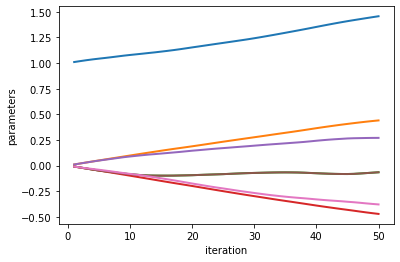

obj = 0.0399209110385975 rejection rate = 0.24000000000000005


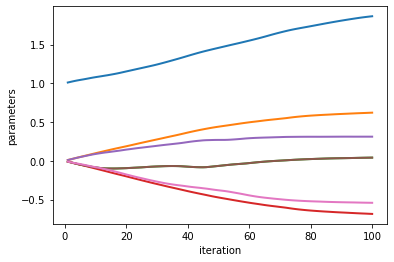

obj = -0.0700921463439251 rejection rate = 0.12000000000000002


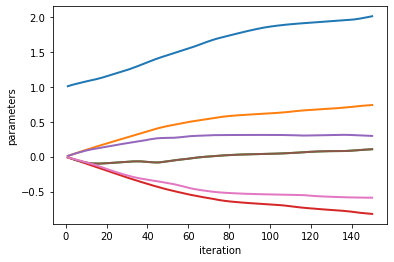

seconds = 3.8027329444885254
[0, 1, 2, 3] 0.09318873734599992
[0, 1, 2, 7] 0.093079842461682
[0, 1, 3, 6] -0.09307984246168195
[0, 1, 6, 7] 0.08927387680140378
[0, 2, 3, 5] 0.09307984246168195
[0, 2, 5, 7] -0.038520157952573006
[0, 3, 4, 7] -0.4239716378070571
[0, 3, 5, 6] 0.5171603751530566
[0, 5, 6, 7] 0.09307984246168191
[1, 2, 3, 4] -0.09307984246168195
[1, 2, 4, 7] 0.5171603751530569
[1, 2, 5, 6] -0.42397163780705666
[1, 3, 4, 6] -0.038520157952573006
[1, 4, 6, 7] -0.09307984246168195
[2, 3, 4, 5] 0.08927387680140372
[2, 4, 5, 7] 0.09307984246168191
[3, 4, 5, 6] -0.09307984246168187
[4, 5, 6, 7] 0.09318873734599983
energy = -1.5426283189283154 normalization factor = 0.016307738930630866 fidelity = 0.9768084710931009


In [2]:
mdl = VariationalModel(1)
H = (-0.2 * mdl.lattice.Ht, mdl.lattice.HJ)
states = mdl.MCruns(steps=20, wlks=20, carry_prob=True, flatten=False).reset()
optimizer = torch.optim.Adam(mdl.parameters(), lr=0.01)
start = time.time()
for iteration in range(200):
    obj, MCenergy, states = mdl.MCruns(H=H, cut=(None, None), states=states, steps=5, carry_prob=True, flatten=False)
    loss = obj #- Hval.detach()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if iteration%50 ==0 and iteration > 5:
        print('obj =', loss.item(), 'rejection rate =',mdl._rejects/mdl._step)
        mdl.show()
    mdl.record()
    mdl.reset()
    states.reset()
end = time.time()
print('seconds =',end - start)
test(mdl)

## sampling test

#### sampling L = 8, steps = 100

In [4]:
mdl = VariationalModel(8)
H = -0.2* mdl.lattice.Ht + mdl.lattice.HJ
start = time.time()
state = mdl.MCrun(steps=100).reset()
end = time.time()
print('seconds =',end - start)

seconds = 0.2823817729949951


In [5]:
state

VariationalState([396, 392, 184, 460, 352, 296, 492, 280, 336, 20, 504, 132, 500, 340, 84, 72, 208, 96, 42, 408, 258, 308, 104, 204, 244, 228, 466, 192, 232, 268, 112, 168, 484, 0, 248, 320, 76, 12, 472, 488, 288, 342, 128, 156, 508, 92, 144, 444, 368, 412, 4, 44, 188, 28, 264, 496, 436, 376, 306, 292, 456, 36, 56, 152, 249, 109, 433, 401, 25, 73, 237, 17, 57, 409, 213, 121, 153, 333, 505, 5, 499, 37, 509, 45, 317, 373, 293, 357, 397, 181, 425, 309, 389, 29, 285, 93, 117, 231, 101, 133, 417, 193, 241, 97, 77, 465, 189, 217, 289, 381, 53, 165, 201, 325, 405, 209, 197, 489, 441, 365, 457, 413, 81, 1, 221, 173, 71, 353, 32, 142, 214, 222, 302, 146, 266, 274, 314, 422, 318, 348, 294, 58, 426, 478, 262, 290, 18, 286, 34, 118, 10, 122, 366, 510, 386, 322, 390, 270, 394, 14, 278, 174, 166, 170, 238, 54, 190, 418, 362, 198, 66, 430, 382, 370, 88, 406, 98, 346, 30, 206, 450, 282, 226, 246, 438, 6, 38, 94, 498, 178, 70, 250, 303, 335, 235, 139, 203, 391, 155, 467, 387, 51, 455, 83, 115, 205, 151

In [6]:
for n in range(1, 21):    
    mdl = VariationalModel(8)
    H = -0.2* mdl.lattice.Ht + mdl.lattice.HJ
    start = time.time()
    states = mdl.MCruns(steps=100, wlks=n).reset()
    end = time.time()
    print('walkers = ',n,'seconds = ',end - start, 'seconds per walker = ', (end - start)/n)

walkers =  1 seconds =  0.2956421375274658 seconds per walker =  0.2956421375274658
walkers =  2 seconds =  0.43195486068725586 seconds per walker =  0.21597743034362793
walkers =  3 seconds =  0.6100442409515381 seconds per walker =  0.20334808031717935
walkers =  4 seconds =  0.7423610687255859 seconds per walker =  0.18559026718139648
walkers =  5 seconds =  0.9443550109863281 seconds per walker =  0.18887100219726563
walkers =  6 seconds =  1.1135120391845703 seconds per walker =  0.18558533986409506
walkers =  7 seconds =  1.3126788139343262 seconds per walker =  0.18752554484776088
walkers =  8 seconds =  1.4951839447021484 seconds per walker =  0.18689799308776855
walkers =  9 seconds =  1.829981803894043 seconds per walker =  0.20333131154378256
walkers =  10 seconds =  2.1673970222473145 seconds per walker =  0.21673970222473143
walkers =  11 seconds =  2.2122578620910645 seconds per walker =  0.20111435109918768
walkers =  12 seconds =  2.3848578929901123 seconds per walker =

In [7]:
len(states.configs)

20